In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
df_up    = pd.read_excel('http://www.censusindia.gov.in/datagov/2001_files/c09/DDWC-090009.xls')
df_india = pd.read_excel('http://www.censusindia.gov.in/datagov/2001_files/c09/DDWC-000009.xls')

In [4]:
df_up.head(2)

,Table Name,State Code,District Code,Tehsil Code,Area Name,Total/ Rural/ Urban,Religion,Age-group,Total population - Persons,Total population - Males,Total population - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational level - Literate without educational level - Persons,Educational level - Literate without educational level - Males,Educational level - Literate without educational level - Females,Educational level - Below primary - Persons,Educational level - Below primary - Males,Educational level - Below primary - Females,Educational level - Primary - Persons,Educational level - Primary - Males,Educational level - Primary - Females,Educational level - Middle - Persons,Educational level - Middle - Males,Educational level - Middle - Females,Educational level - Matric/Secondary - Persons,Educational level - Matric/Secondary - Males,Educational level - Matric/Secondary - Females,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Persons,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Males,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Females,Educational level - Non-technical diploma or certificate not equal to degree - Persons,Educational level - Non-technical diploma or certificate not equal to degree - Males,Educational level - Non-technical diploma or certificate not equal to degree - Females,Educational level - Technical diploma or certificate not equal to degree - Persons,Educational level - Technical diploma or certificate not equal to degree - Males,Educational level - Technical diploma or certificate not equal to degree - Females,Educational level - Graduate & above - Persons,Educational level - Graduate & above - Males,Educational level - Graduate & above - Females,Educational level - Unclassified - Persons,Educational level - Unclassified - Males,Educational level - Unclassified - Females
0,C2909,9,0,0,State - UTTAR PRADESH 09,Total,All Religious Communities,Total,166197921,87565369,78632552,90478637,38663956,51814681,75719284,48901413,26817871,3272335,1961714,1310621,19226939,11278968,7947971,18694554,11368153,7326401,14329834,9819868,4509966,9121682,6561958,2559724,5961518,4205753,1755765,30477,21973,8504,95153,83190,11963,4969397,3588610,1380787,17395,11226,6169
1,C2909,9,0,0,State - UTTAR PRADESH 09,Total,All Religious Communities,0-6,31624628,16509033,15115595,31624628,16509033,15115595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_india.head(2)

,Table Name,State Code,District Code,Tehsil Code,Area Name,Total/ Rural/ Urban,Religion,Age-group,Total population - Persons,Total population - Males,Total population - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational level - Literate without educational level - Persons,Educational level - Literate without educational level - Males,Educational level - Literate without educational level - Females,Educational level - Below primary - Persons,Educational level - Below primary - Males,Educational level - Below primary - Females,Educational level - Primary - Persons,Educational level - Primary - Males,Educational level - Primary - Females,Educational level - Middle - Persons,Educational level - Middle - Males,Educational level - Middle - Females,Educational level - Matric/Secondary - Persons,Educational level - Matric/Secondary - Males,Educational level - Matric/Secondary - Females,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Persons,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Males,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Females,Educational level - Non-technical diploma or certificate not equal to degree - Persons,Educational level - Non-technical diploma or certificate not equal to degree - Males,Educational level - Non-technical diploma or certificate not equal to degree - Females,Educational level - Technical diploma or certificate not equal to degree - Persons,Educational level - Technical diploma or certificate not equal to degree - Males,Educational level - Technical diploma or certificate not equal to degree - Females,Educational level - Graduate & above - Persons,Educational level - Graduate & above - Males,Educational level - Graduate & above - Females,Educational level - Unclassified - Persons,Educational level - Unclassified - Males,Educational level - Unclassified - Females
0,C2909,0,0,0,INDIA,Total,All Religious Communities,Total,1028610328,532156772,496453556,467922531,195623056,272299475,560687797,336533716,224154081,20022966,11361139,8661827,144831273,81148130,63683143,146740047,83525450,63214597,90226846,55940422,34286424,79229721,51201516,28028205,37816215,24596339,13219876,386146,258604,127542,3666680,2900839,765841,37670147,25533308,12136839,97756,67969,29787
1,C2909,0,0,0,INDIA,Total,All Religious Communities,0-6,163819614,84999203,78820411,163819614,84999203,78820411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
india = df_india.where(df_india['Area Name'] == 'INDIA').dropna()
india = india.where(india['Age-group'] == 'Total').dropna()
india = india.where(india['Total/ Rural/ Urban'] == 'Total').dropna()


up = df_up.where(df_up['Area Name'] == 'State - UTTAR PRADESH  09').dropna()
up = up.where(up['Age-group'] == 'Total').dropna()
up = up.where(up['Total/ Rural/ Urban'] == 'Total').dropna()

In [8]:
up.head()

,Table Name,State Code,District Code,Tehsil Code,Area Name,Total/ Rural/ Urban,Religion,Age-group,Total population - Persons,Total population - Males,Total population - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational level - Literate without educational level - Persons,Educational level - Literate without educational level - Males,Educational level - Literate without educational level - Females,Educational level - Below primary - Persons,Educational level - Below primary - Males,Educational level - Below primary - Females,Educational level - Primary - Persons,Educational level - Primary - Males,Educational level - Primary - Females,Educational level - Middle - Persons,Educational level - Middle - Males,Educational level - Middle - Females,Educational level - Matric/Secondary - Persons,Educational level - Matric/Secondary - Males,Educational level - Matric/Secondary - Females,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Persons,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Males,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Females,Educational level - Non-technical diploma or certificate not equal to degree - Persons,Educational level - Non-technical diploma or certificate not equal to degree - Males,Educational level - Non-technical diploma or certificate not equal to degree - Females,Educational level - Technical diploma or certificate not equal to degree - Persons,Educational level - Technical diploma or certificate not equal to degree - Males,Educational level - Technical diploma or certificate not equal to degree - Females,Educational level - Graduate & above - Persons,Educational level - Graduate & above - Males,Educational level - Graduate & above - Females,Educational level - Unclassified - Persons,Educational level - Unclassified - Males,Educational level - Unclassified - Females
0,C2909,9.0,0.0,0.0,State - UTTAR PRADESH 09,Total,All Religious Communities,Total,166197921.0,87565369.0,78632552.0,90478637.0,38663956.0,51814681.0,75719284.0,48901413.0,26817871.0,3272335.0,1961714.0,1310621.0,19226939.0,11278968.0,7947971.0,18694554.0,11368153.0,7326401.0,14329834.0,9819868.0,4509966.0,9121682.0,6561958.0,2559724.0,5961518.0,4205753.0,1755765.0,30477.0,21973.0,8504.0,95153.0,83190.0,11963.0,4969397.0,3588610.0,1380787.0,17395.0,11226.0,6169.0
21,C2909,9.0,0.0,0.0,State - UTTAR PRADESH 09,Total,Hindu,Total,133979263.0,70756011.0,63223252.0,70779752.0,29661453.0,41118299.0,63199511.0,41094558.0,22104953.0,2340549.0,1441696.0,898853.0,15293289.0,8995926.0,6297363.0,15244431.0,9211285.0,6033146.0,12482490.0,8541749.0,3940741.0,7983031.0,5786205.0,2196826.0,5321813.0,3795754.0,1526059.0,11572.0,10338.0,1234.0,83686.0,74172.0,9514.0,4430361.0,3231795.0,1198566.0,8289.0,5638.0,2651.0
42,C2909,9.0,0.0,0.0,State - UTTAR PRADESH 09,Total,Muslim,Total,30740158.0,16028562.0,14711596.0,19115867.0,8744844.0,10371023.0,11624291.0,7283718.0,4340573.0,893002.0,496496.0,396506.0,3779513.0,2196807.0,1582706.0,3270179.0,2058867.0,1211312.0,1693255.0,1181872.0,511383.0,996676.0,685162.0,311514.0,539053.0,352556.0,186497.0,18493.0,11336.0,7157.0,8673.0,7437.0,1236.0,416596.0,287738.0,128858.0,8851.0,5447.0,3404.0
63,C2909,9.0,0.0,0.0,State - UTTAR PRADESH 09,Total,Christian,Total,212578.0,108430.0,104148.0,80345.0,36241.0,44104.0,132233.0,72189.0,60044.0,5404.0,2865.0,2539.0,20522.0,11456.0,9066.0,21679.0,12353.0,9326.0,19738.0,11963.0,7775.0,22270.0,12842.0,9428.0,19420.0,9279.0,10141.0,162.0,95.0,67.0,1351.0,365.0,986.0,21612.0,10947.0,10665.0,75.0,24.0,51.0
84,C2909,9.0,0.0,0.0,State - UTTAR PRADESH 09,Total,Sikh,Total,678059.0,361320.0,316739.0,258998.0,116627.0,142371.0,419061.0,244693.0,174368.0,14083.0,8227.0,5856.0,72792.0,40542.0,32250.0,94643.0,49490.0,45153.0,78050.0,48732.0,29318.0,71792.0,47400.0,24392.0,40922.0,24023.0,16899.0,147.

In [9]:
india.head()

,Table Name,State Code,District Code,Tehsil Code,Area Name,Total/ Rural/ Urban,Religion,Age-group,Total population - Persons,Total population - Males,Total population - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,Literate - Males,Literate - Females,Educational level - Literate without educational level - Persons,Educational level - Literate without educational level - Males,Educational level - Literate without educational level - Females,Educational level - Below primary - Persons,Educational level - Below primary - Males,Educational level - Below primary - Females,Educational level - Primary - Persons,Educational level - Primary - Males,Educational level - Primary - Females,Educational level - Middle - Persons,Educational level - Middle - Males,Educational level - Middle - Females,Educational level - Matric/Secondary - Persons,Educational level - Matric/Secondary - Males,Educational level - Matric/Secondary - Females,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Persons,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Males,Educational level - Higher secondary/Intermediate/Pre-University/Senior secondary - Females,Educational level - Non-technical diploma or certificate not equal to degree - Persons,Educational level - Non-technical diploma or certificate not equal to degree - Males,Educational level - Non-technical diploma or certificate not equal to degree - Females,Educational level - Technical diploma or certificate not equal to degree - Persons,Educational level - Technical diploma or certificate not equal to degree - Males,Educational level - Technical diploma or certificate not equal to degree - Females,Educational level - Graduate & above - Persons,Educational level - Graduate & above - Males,Educational level - Graduate & above - Females,Educational level - Unclassified - Persons,Educational level - Unclassified - Males,Educational level - Unclassified - Females
0,C2909,0.0,0.0,0.0,INDIA,Total,All Religious Communities,Total,1.028610e+09,532156772.0,496453556.0,467922531.0,195623056.0,272299475.0,560687797.0,336533716.0,224154081.0,20022966.0,11361139.0,8661827.0,144831273.0,81148130.0,63683143.0,146740047.0,83525450.0,63214597.0,90226846.0,55940422.0,34286424.0,79229721.0,51201516.0,28028205.0,37816215.0,24596339.0,13219876.0,386146.0,258604.0,127542.0,3666680.0,2900839.0,765841.0,37670147.0,25533308.0,12136839.0,97756.0,67969.0,29787.0
21,C2909,0.0,0.0,0.0,INDIA,Total,Hindu,Total,8.275789e+08,428678554.0,398900314.0,373086694.0,153387498.0,219699196.0,454492174.0,275291056.0,179201118.0,15967369.0,9094968.0,6872401.0,115431840.0,64912735.0,50519105.0,118160890.0,67639325.0,50521565.0,73540999.0,45987714.0,27553285.0,64783250.0,42364431.0,22418819.0,31461244.0,20800147.0,10661097.0,276893.0,191444.0,85449.0,2968098.0,2426206.0,541892.0,31842113.0,21831966.0,10010147.0,59478.0,42120.0,17358.0
42,C2909,0.0,0.0,0.0,INDIA,Total,Muslim,Total,1.381882e+08,71374134.0,66814106.0,71791606.0,32126053.0,39665553.0,66396634.0,39248081.0,27148553.0,2981871.0,1682454.0,1299417.0,21152232.0,11788764.0,9363468.0,19225487.0,10958148.0,8267339.0,10052728.0,6196776.0,3855952.0,7280155.0,4693871.0,2586284.0,3009440.0,1963798.0,1045642.0,67747.0,46383.0,21364.0,206132.0,165664.0,40468.0,2387681.0,1729438.0,658243.0,33161.0,22785.0,10376.0
63,C2909,0.0,0.0,0.0,INDIA,Total,Christian,Total,2.408002e+07,11984663.0,12095353.0,7355551.0,3264268.0,4091283.0,16724465.0,8720395.0,8004070.0,553219.0,288566.0,264653.0,3332075.0,1697727.0,1634348.0,3772906.0,1970360.0,1802546.0,2864624.0,1535430.0,1329194.0,2923028.0,1546749.0,1376279.0,1454844.0,697077.0,757767.0,23218.0,11137.0,12081.0,342759.0,203585.0,139174.0,1455982.0,768856.0,687126.0,1810.0,908.0,902.0
84,C2909,0.0,0.0,0.0,INDIA,Total,Sikh,Total,1.921573e+07,10152298.0,9063432.0,7578945.0,3550752.0,4028193.0,11636785.0,6601546.0,5035239.0,212890.0,111887.0,101003.0,2192150.0,

In [10]:
india.columns

Index(['Table Name', 'State Code', 'District Code', 'Tehsil Code', 'Area Name',
       'Total/ Rural/ Urban', 'Religion', 'Age-group',
       'Total population - Persons', 'Total population - Males',
       'Total population - Females', 'Illiterate - Persons',
       'Illiterate - Males', 'Illiterate - Females', 'Literate - Persons',
       'Literate - Males', 'Literate - Females',
       'Educational level - Literate without educational level - Persons',
       'Educational level - Literate without educational level - Males',
       'Educational level - Literate without educational level - Females',
       'Educational level - Below primary - Persons',
       'Educational level - Below primary - Males',
       'Educational level - Below primary - Females',
       'Educational level - Primary - Persons',
       'Educational level - Primary - Males',
       'Educational level - Primary - Females',
       'Educational level - Middle - Persons',
       'Educational level - Middle - Males'

In [11]:
up.columns

Index(['Table Name', 'State Code', 'District Code', 'Tehsil Code', 'Area Name',
       'Total/ Rural/ Urban', 'Religion', 'Age-group',
       'Total population - Persons', 'Total population - Males',
       'Total population - Females', 'Illiterate - Persons',
       'Illiterate - Males', 'Illiterate - Females', 'Literate - Persons',
       'Literate - Males', 'Literate - Females',
       'Educational level - Literate without educational level - Persons',
       'Educational level - Literate without educational level - Males',
       'Educational level - Literate without educational level - Females',
       'Educational level - Below primary - Persons',
       'Educational level - Below primary - Males',
       'Educational level - Below primary - Females',
       'Educational level - Primary - Persons',
       'Educational level - Primary - Males',
       'Educational level - Primary - Females',
       'Educational level - Middle - Persons',
       'Educational level - Middle - Males'

In [12]:
up['Sex Ratio'] = up['Total population - Females']/up['Total population - Males']*1000
india['Sex Ratio'] = india['Total population - Females']/india['Total population - Males']*1000

In [13]:
up['Sex Ratio']

0      897.986874
21     893.538953
42     917.836297
63     960.509084
84     876.616296
105    894.704155
126    911.499769
147    870.792179
Name: Sex Ratio, dtype: float64

In [14]:
india['Sex Ratio']

0       932.908463
21      930.534803
42      936.110917
63     1009.235971
84      892.746844
105     952.602932
126     940.413742
147     992.355406
Name: Sex Ratio, dtype: float64

In [15]:
#Religion_map = {0:'All Religious Communities',21:'Hindu',42:'Muslim',
#                63:'Christian',84:'Sikh',105:'Buddhist',126:'Jain',147:'Other Religious Communities'}
#Religion_list = ['All Religious Communities','Hindu','Muslim',
#                 'Christian','Sikh','Buddhist','Jain','Other Religious Communities']

In [16]:
#up.index = up.index.map(Religion_map)
#india.index = india.index.map(Religion_map)

In [17]:
#_ = up['Sex Ratio'].plot(kind='bar',color='r')

In [18]:
#_ = india['Sex Ratio'].plot(kind='bar',color='r')

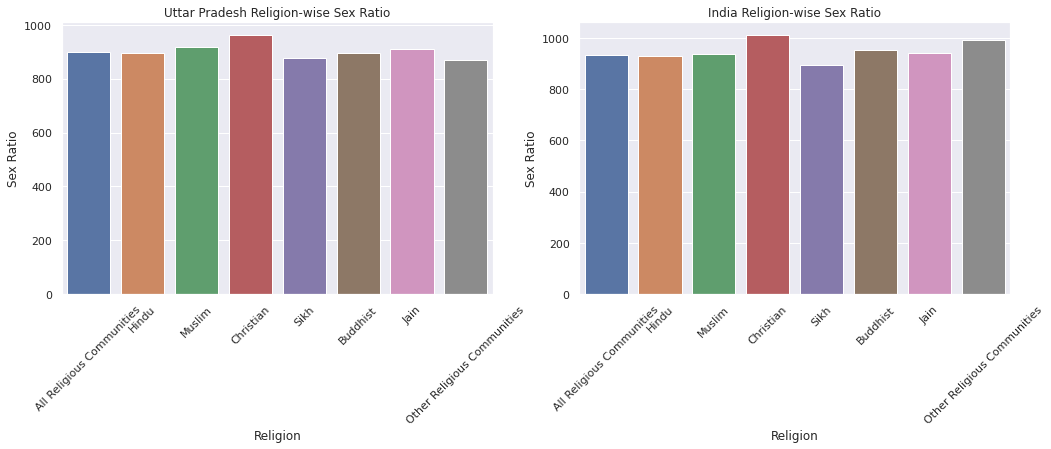

In [19]:
sns.set(rc={'figure.figsize':(17,5)})
for i,j in enumerate([up,india]):
    plt.subplot(1,2,i+1)
    g=sns.barplot(x='Religion', y='Sex Ratio',data=j)
    x = g.xaxis
    for item in x.get_ticklabels():
        item.set_rotation(45)
    if i==0:
        plt.title('Uttar Pradesh Religion-wise Sex Ratio')
    else:
        plt.title('India Religion-wise Sex Ratio')